<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_Filepath = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

pkmn = pd.read_csv(csv_Filepath)

pkmn

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `replot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

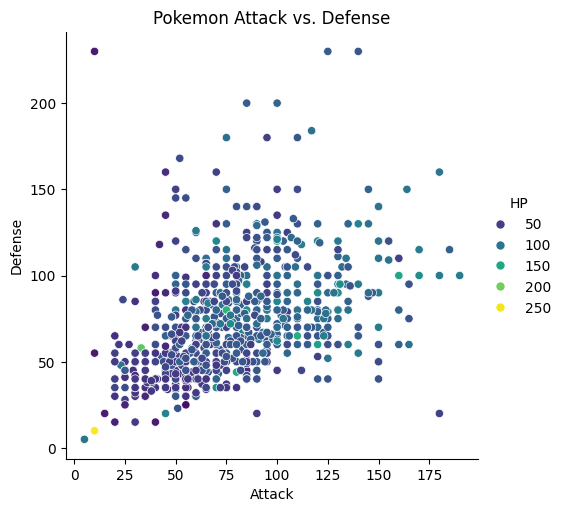

In [2]:
# Your code here . . .
%matplotlib inline
sns.relplot(data=pkmn,
            x="Attack",
            y="Defense",
            hue="HP",
            palette="viridis")

plt.title("Pokemon Attack vs. Defense");


From the plot, I observed that the Attack and Defense stats of the Pokemon are relatively close to each other. There are many pokemon with low attack and defense and many with mid attack and defense. There are a few outliers of pokemon who have high defense with a weaker attack and vice versa. Pokemon with smaller HP also have smaller Attack and Defense it seems.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

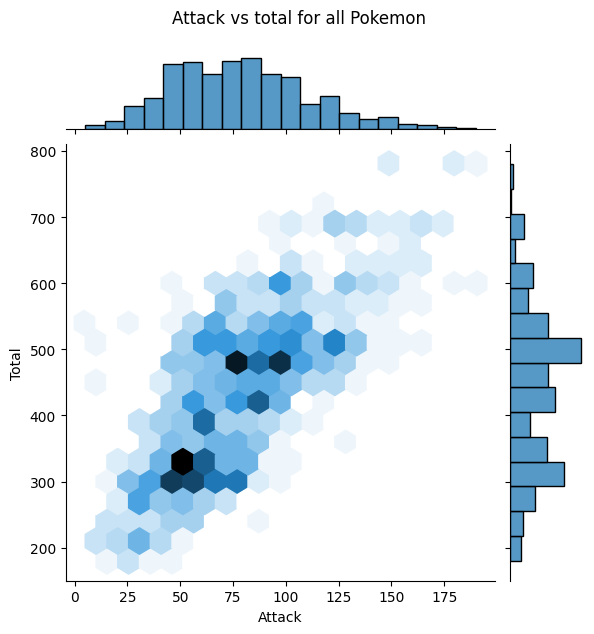

In [3]:
# Your code here . . .
g=sns.jointplot(
    data=pkmn,
    x="Attack",
    y="Total",
    kind="hex"
)

g.fig.suptitle("Attack vs total for all Pokemon", y=1.05);

From the plot, I observed that there are not many Pokemon with a high total and high attack, meaning that Pokemon with a high attack must have lower defense to balance it out. The most common total is between 300-500 with attack being between 50 - 100.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

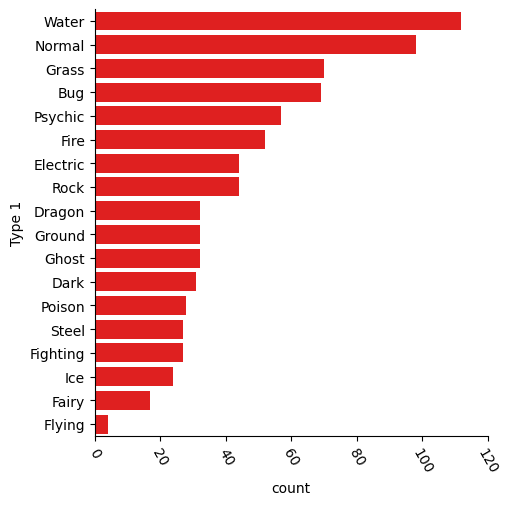

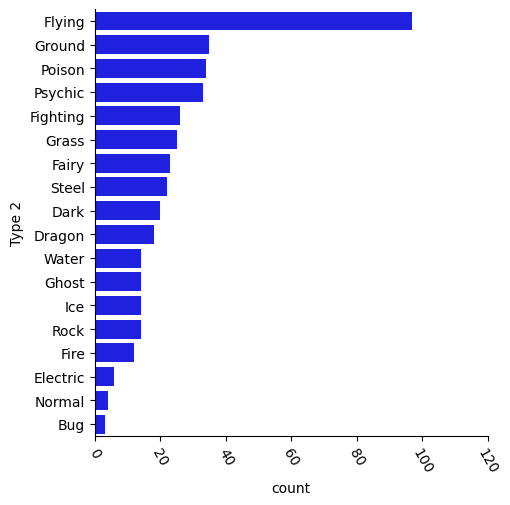

In [7]:
# Your code here . . .
type1s = pkmn["Type 1"].value_counts().to_frame()
type2s = pkmn["Type 2"].value_counts().to_frame()

g=sns.catplot(
    x="count",
    y= 'Type 1',
    data=type1s,
    kind='bar',
    color='red'
);
g.set_xticklabels(rotation=300);

g2=sns.catplot(
    x="count",
    y= 'Type 2',
    data=type2s,
    kind='bar',
    color='blue'
);
g2.set_xticklabels(rotation=300);


### Ans:
The most common Type 1 for Pokemon is Water while the most common Type 2 is Flying. The most rare Type 1 is Flying and the most rare Type 2 is Bug.